In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv("sonar.txt",sep=",",header=None)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [42]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [43]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

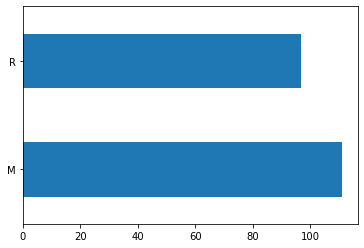

In [44]:
df[60].value_counts().plot(kind='barh')
#check whether data is imblaced or not
    

In [45]:
from sklearn.preprocessing import  LabelEncoder

label_quality = LabelEncoder()
df[60] = label_quality.fit_transform(df[60])
#converting the data in continuous 

In [46]:
df[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

In [71]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1.5:
        df[col]=np.log1p(df[col])

In [72]:
df.skew()

0     0.892456
1     0.630380
2     0.741541
3     0.520650
4     0.677697
        ...   
56    0.960592
57    1.065490
58    1.251572
59    1.020079
60   -0.055386
Length: 61, dtype: float64

In [73]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3


In [74]:
df =df[(z < 3).all(axis=1)]
#removing outliers

In [75]:
df.skew()

0     0.469841
1     0.630193
2     0.684419
3     0.499851
4     0.647082
        ...   
56    0.921491
57    0.866632
58    0.742702
59    1.004335
60    0.033201
Length: 61, dtype: float64

In [76]:
x = df.drop(60, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.019419,0.035155,0.040235,0.020079,0.087204,0.089874,0.133785,0.138462,0.239579,0.175237,...,0.002689,0.006458,0.015652,0.007123,0.016426,0.017528,0.008296,0.008880,0.003185,1
7,0.048180,0.050671,0.074867,0.030450,0.103974,0.084519,0.093273,0.057792,0.128141,0.223003,...,0.008003,0.011858,0.004480,0.011885,0.009607,0.008393,0.004667,0.004766,0.005258,1
8,0.021581,0.035514,0.045148,0.044363,0.060806,0.055831,0.070085,0.009705,0.064065,0.129827,...,0.014192,0.012639,0.014293,0.005750,0.004876,0.006437,0.009172,0.005848,0.002193,1
9,0.016007,0.016864,0.032992,0.006927,0.018358,0.062923,0.095663,0.065205,0.087873,0.024488,...,0.008880,0.021815,0.017586,0.008296,0.006754,0.003185,0.003482,0.005553,0.003976,1
10,0.003877,0.006241,0.014862,0.031996,0.030072,0.027619,0.038101,0.026483,0.031295,0.043259,...,0.006143,0.011858,0.005173,0.005553,0.009214,0.004174,0.000300,0.005258,0.003581,1


In [77]:
y=pd.DataFrame(df[60])

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
df_x=sc.transform(x)
df_x=pd.DataFrame(x,columns=x.columns)

In [79]:
#training and testing the data set

In [80]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [81]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

maximum f1_score is at random state : 92  and it is : 0.923076923076923


In [82]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.6449657869012707
standard deviation in f1 score for logistic classifier:  0.054965327085592056
[0.66666667 0.70967742 0.63636364 0.66666667 0.54545455]


In [83]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,x,y)

maximum f1_score is at random state : 69  and it is : 0.923076923076923


In [84]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,x,y,cv=5,scoring="f1"))


Mean f1 score for decision tree classifier:  0.6166057983154172
standard deviation in f1 score for decision tree classifier:  0.06272436960529452
[0.58333333 0.61538462 0.61538462 0.66666667 0.73684211]


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 1}

In [88]:
kc=KNeighborsClassifier(n_neighbors=1)
maxf1_score(kc,x,y)

maximum f1_score is at random state : 89  and it is : 0.9600000000000001


In [89]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,x,y,cv=5,scoring="f1"))

Mean f1 score for knn classifier:  0.5532581453634086
standard deviation in f1 score for knn classifier:  0.13478257742095723
[0.57142857 0.57142857 0.41666667 0.78571429 0.42105263]


In [90]:
#out of the above 4 we can use either decision tree or randomforest


In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
y_pred=dc.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[14  3]
 [ 3 14]]
f1 score is :  0.8235294117647058
classification report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.82      0.82      0.82        17

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34

